In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Importing the dataset for my model
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
#Droping unnecessary columns
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
#Count of unique values
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
#Feature encoding of the Classes column
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [ ]:
#Counting for unique values in the Classes column
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
#Seperating my fetures in to independent and independent 
x = df.drop('FWI', axis = 1)
y = df['FWI']

In [14]:
x.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.25, random_state = 42)

In [ ]:
#Checking the shape
x.shape, x_train.shape, x_test.shape

((243, 11), (182, 11), (61, 11))

In [18]:
#Feature selection based on correlation 
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


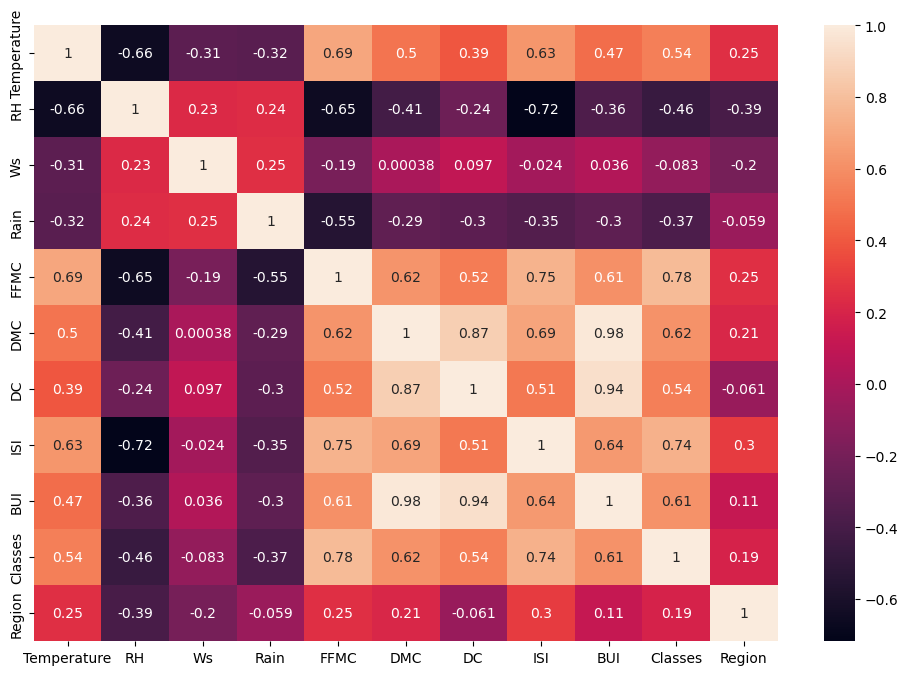

In [ ]:
##Checking for multicollitinearity. N/B independent features should not be that much correlated depending on some threshold values set
plt.figure(figsize = (12, 8))
corr  =x_train.corr()
sns.heatmap(corr, annot = True);

In [ ]:
#Setting my threshold to check for multicollinearity
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
# N/B threshold is set by domain expertise or Product Manager, but im seeting mine to 85%
corr_features = correlation(x_train, 0.85)

In [ ]:
##Droping the threshold features when correlation is more than 0.85 
x_train.drop(corr_features, axis = 1, inplace = True)
x_test.drop(corr_features, axis = 1, inplace = True)

In [23]:
x_train.shape, x_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization

In [ ]:
#Standardizing my independent features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#Standardize x_train data
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [ ]:
#Standardize x_test data
x_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

## Box Plot to See the Effect of Standard Scaler


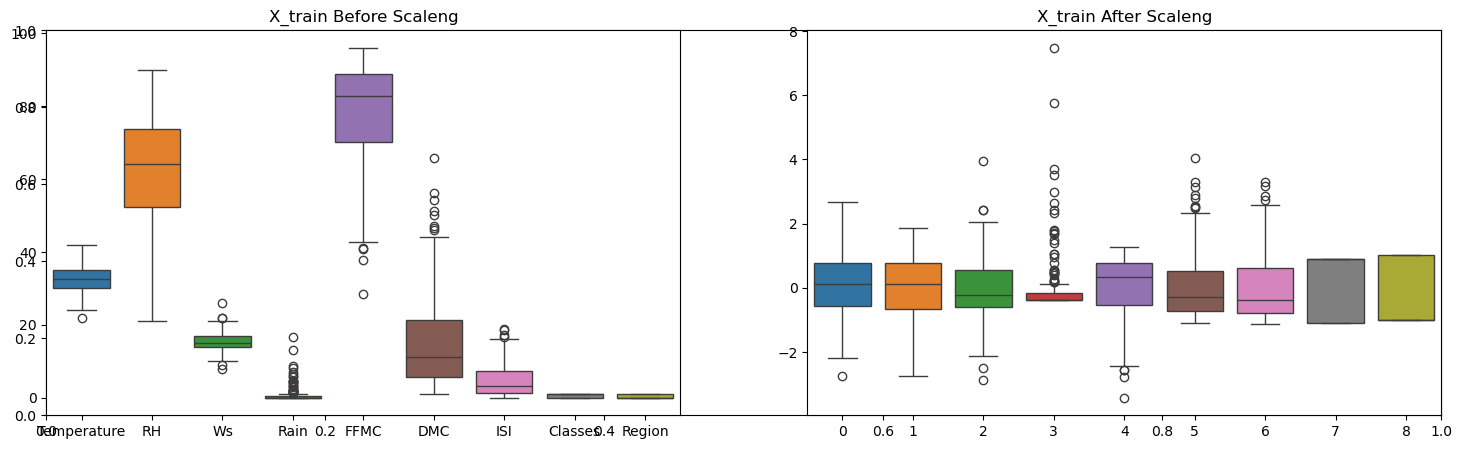

In [ ]:
plt.subplots(figsize = (18, 5)) 
plt.subplot(1, 2, 1)
sns.boxplot(data = x_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data = x_train_scaled)
plt.title('X_train After Scaling')
plt.show()


## Linear Regression Model Application

In [ ]:
#Importing the necessary libraries for my linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [32]:
linreg = LinearRegression()

In [33]:
#fitting the x_train_scaled to the ligression

linreg.fit(x_train_scaled, y_train)

LinearRegression()

In [34]:
#x_test_scaled prediction
y_prediction = linreg.predict(x_test_scaled)

In [35]:
#Predicting the mean absolute error of y_test
mae = mean_absolute_error(y_test, y_prediction)


In [36]:
#R2 score 
score = r2_score(y_test, y_prediction)

In [37]:
print('Mean Absolute Error', mae)
print('R2 Score', score)

Mean Absolute Error 0.5468236465249978
R2 Score 0.9847657384266951


'This is a very good model as it follows a linear regression relationship'

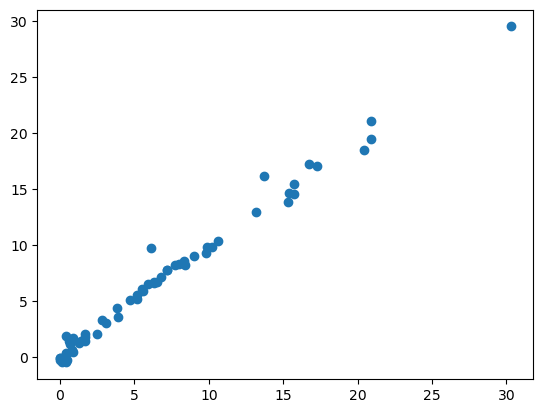

In [38]:
plt.scatter(y_test, y_prediction);
'''This is a very good model as it follows a linear regression relationship'''

## Lasso Regression

In [ ]:
#Importing the necessary libraries
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
#lasso = Lasso(alpha=1.0)  # You can adjust the alpha value as needed

In [42]:
#Lasso.fit(x_train_scaled, y_train)
lasso.fit(x_train_scaled, y_train)

Lasso()

In [ ]:
# Making predictions on the scaled test data using the model instance
y_prediction = lasso.predict(x_test_scaled)  # Use the instance here

In [44]:
#Predicting the mean absolute error of y_test
mae = mean_absolute_error(y_test, y_prediction)

In [45]:
#R2 score 
score = r2_score(y_test, y_prediction)
print('Mean Absolute Error', mae)
print('R2 Score', score)

Mean Absolute Error 1.1331759949144085
R2 Score 0.9492020263112388


'This is a very good model as it follows a Lasso Regression relationship'

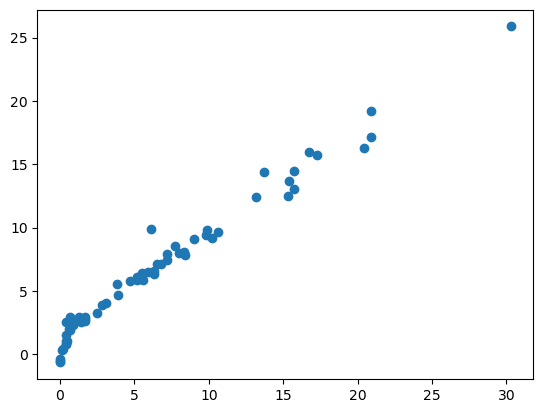

In [46]:
plt.scatter(y_test, y_prediction);
'''This is a very good model as it follows a Lasso Regression relationship'''

## Cross Validation using Lasso CV

In [ ]:
from sklearn.linear_model import LassoCV

Lassocv = LassoCV(cv = 5)
Lassocv.fit(x_train_scaled, y_train)

LassoCV(cv=5)

In [49]:
Lassocv.alpha_

0.05725391318234408

In [50]:
Lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [51]:
Lassocv.predict(x_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

Mean Absolute Error 0.6199701158263431
R2 Score 0.9820946715928275


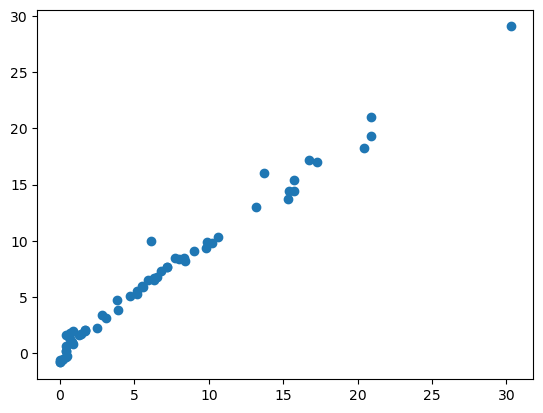

In [ ]:
y_prediction = Lassocv.predict(x_test_scaled)
plt.scatter(y_test, y_prediction);

#Predicting the mean absolute error of y_test
mae = mean_absolute_error(y_test, y_prediction)

#R2 score 
score = r2_score(y_test, y_prediction)
print('Mean Absolute Error', mae)
print('R2 Score', score)

## Ridge Regression model

In [ ]:
#Importing the necessary libraries
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

#fitting the x_train_scaled to the ligression
ridge.fit(x_train_scaled, y_train)

Ridge()

Mean Absolute Error 0.6199701158263431
R2 Score 0.9842993364555513


'This is a very good model as it follows a Ridge Regression relationship, it helps to remove the features that are not important \nin respect to the Ridge Regression Model'

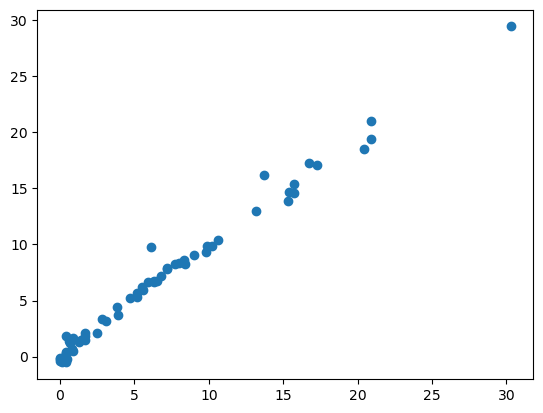

In [ ]:
# Making prediction on the scaled test data using the model instance
y_prediction = ridge.predict(x_test_scaled)  # Use the instance here

#R2 score 
score = r2_score(y_test, y_prediction)
print('Mean Absolute Error', mae)
print('R2 Score', score)

plt.scatter(y_test, y_prediction);
'''This is a very good model as it follows a Ridge Regression relationship, it helps to remove the features that are not important 
in respect to the Ridge Regression Model'''

## RidgeCV Cross Validation

Mean Absolute Error 0.5642305340105693
R2 Score 0.9842993364555513


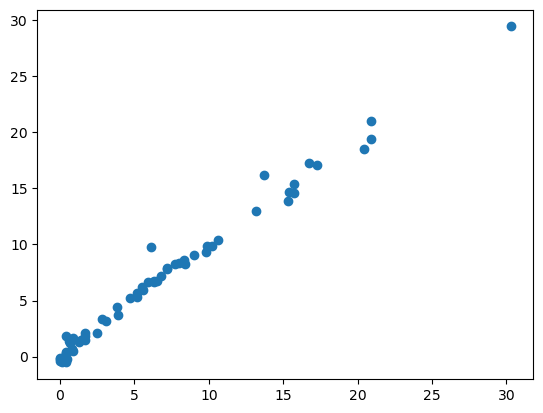

In [58]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(x_train_scaled, y_train)
plt.scatter(y_test, y_prediction);

#Predicting the mean absolute error of y_test
mae = mean_absolute_error(y_test, y_prediction)
#R2 score 
score = r2_score(y_test, y_prediction)
print('Mean Absolute Error', mae)
print('R2 Score', score)

## Elastic Net Regression

In [60]:

#Importing the necessary libraries
from sklearn.linear_model import ElasticNet

Mean Absolute Error 0.5642305340105693
R2 Score 0.8753460589519703


'This is a very good model as it follows a ElasticNet regression relationship'

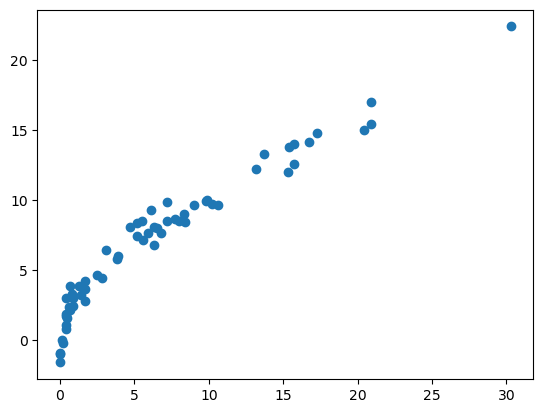

In [ ]:
elastic = ElasticNet()

#elastic.fit(x_train_scaled, y_train)
elastic.fit(x_train_scaled, y_train)

#Making predictions on the scaled test data using the model instance
y_prediction = elastic.predict(x_test_scaled)  # Use the instance here
#R2 score 
score = r2_score(y_test, y_prediction)
print('Mean Absolute Error', mae)
print('R2 Score', score)

plt.scatter(y_test, y_prediction);
'''This is a very good model as it follows a ElasticNet regression relationship'''

## ElasticNetCV Cross Validation

Mean Absolute Error 0.6575946731430904
R2 Score 0.9814217587854941


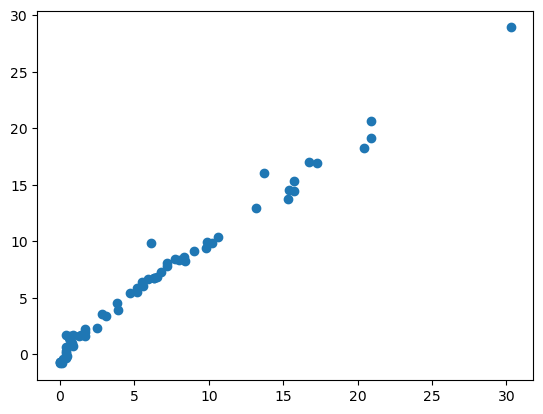

In [63]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(x_train_scaled, y_train)
y_prediction = elasticcv.predict(x_test_scaled)
plt.scatter(y_test, y_prediction);

#Predicting the mean absolute error of y_test
mae = mean_absolute_error(y_test, y_prediction)
#R2 score 
score = r2_score(y_test, y_prediction)
print('Mean Absolute Error', mae)
print('R2 Score', score)